In [1]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as splt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Gender' : 'gender','Age' : 'age','Annual Income (k$)' : 'income','Spending Score (1-100)' : 'score'},inplace = True)

In [5]:
df

,CustomerID,Genre,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID    0
Genre         0
age           0
income        0
score         0
dtype: int64

In [8]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


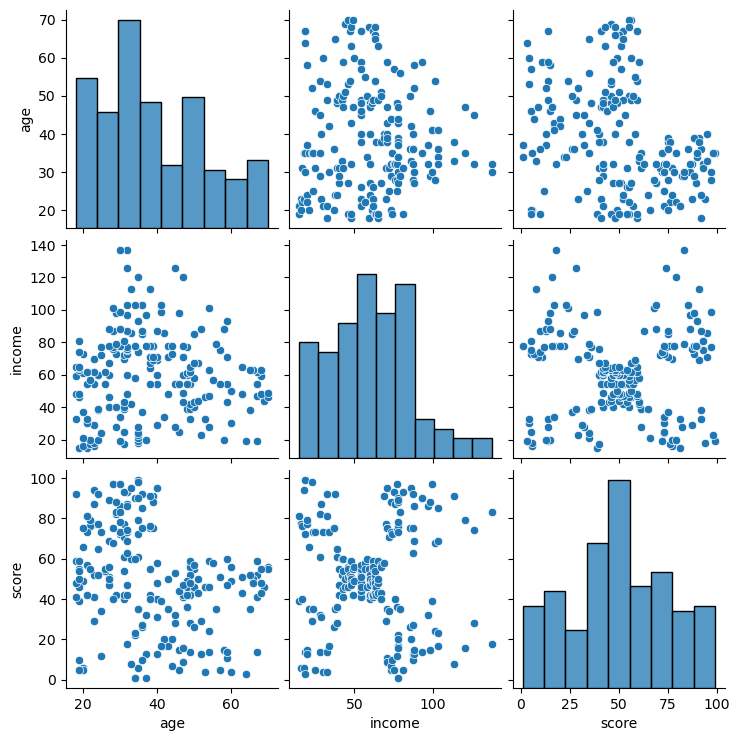

In [9]:
seaborn.pairplot(df[['age','income','score']])

In [10]:
import sklearn.cluster as cluster

In [11]:
kmeans = cluster.KMeans(n_clusters = 5)

In [12]:
kmeans = kmeans.fit(df[['score','income']])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
kmeans.cluster_centers_

array([[79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

In [14]:
df['income_clusters'] = kmeans.labels_

In [15]:
df

,CustomerID,Genre,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [16]:
df['income_clusters'].value_counts()

4    81
1    39
2    35
3    23
0    22
Name: income_clusters, dtype: int64

<Axes: xlabel='income', ylabel='score'>

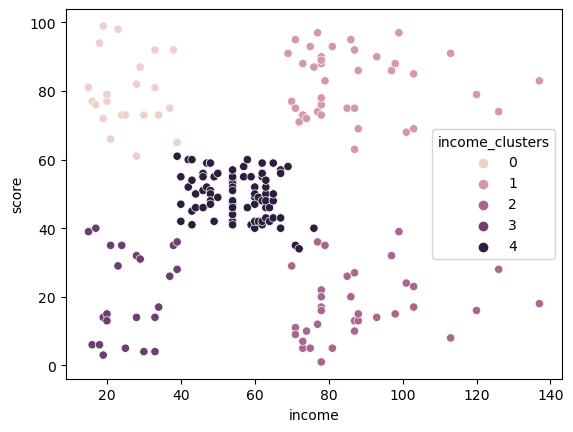

In [17]:
seaborn.scatterplot(x='income', y='score', hue='income_clusters', data=df)

In [18]:
kmeans = cluster.KMeans(n_clusters = 2)

In [19]:
kmeans = kmeans.fit(df[['score','age']])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
kmeans.cluster_centers_

array([[73.62352941, 28.95294118],
       [32.88695652, 46.16521739]])

In [21]:
df['age_clusters'] = kmeans.labels_

In [22]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

In [23]:
df

,CustomerID,Genre,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


<Axes: xlabel='age', ylabel='score'>

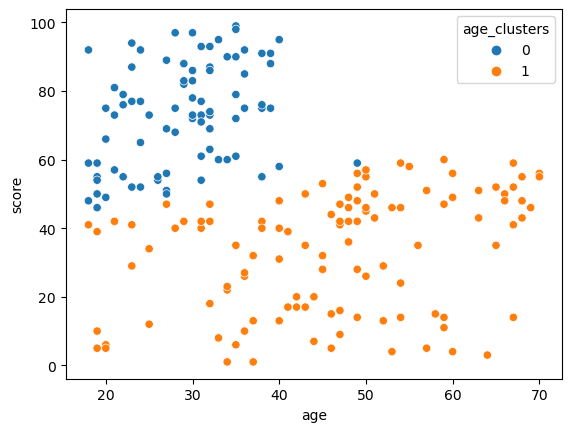

In [24]:
seaborn.scatterplot(x='age', y='score', hue='age_clusters', data=df)

In [25]:
from sklearn.cluster import KMeans

In [26]:
k_range = range(1,12)
wcss = []

In [27]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

In [28]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25030.38309852033,
 21829.135638779822,
 19755.6198608334,
 17945.07665690661]

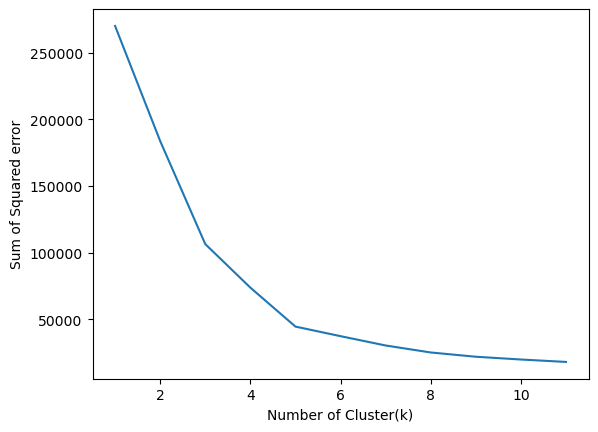

In [30]:
splt.xlabel('Number of Cluster(k)')
splt.ylabel('Sum of Squared error')
splt.plot(k_range,wcss)